In [1]:
# Instalar os pacotes necessários no Python, se ainda não estiverem instalados
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
#from category_encoders import CatBoostEncoder
from sklearn import tree
# Imports
import os
import subprocess
import stat
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import ScalarFormatter
sns.set(style = "white")
%matplotlib inline

In [2]:
# Configuração para evitar notação científica
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv("../../Data/database.csv", encoding = "latin-1")

In [4]:
df =df.drop("Unnamed: 0", axis= 1)

In [5]:
# Verificar se há valores negativos ou zero na coluna "PRECO" antes de prosseguir
data = df[df["PRECO"] > 0]

In [6]:
df

,MARCA,MODELO,TRANSMISSAO,TP_COMBUSTIVEL,MOTO_SIZE,ANO,QUILOMETRAGEM,PRECO
0,TOYOTA,GT86,Manual,Gasolina,2.00,2016,24089,16000000
1,TOYOTA,GT86,Manual,Gasolina,2.00,2017,18615,15995000
2,TOYOTA,GT86,Manual,Gasolina,2.00,2015,27469,13998000
3,TOYOTA,GT86,Manual,Gasolina,2.00,2017,14736,18998000
4,TOYOTA,GT86,Manual,Gasolina,2.00,2017,36284,17498000
...,...,...,...,...,...,...,...,...
71618,VOLKSWAGEN,Eos,Manual,GasolÃ©o,2.00,2012,74000,5990000
71619,VOLKSWAGEN,Fox,Manual,Gasolina,1.20,2008,88102,1799000
71620,VOLKSWAGEN,Fox,Manual,Gasolina,1.40,2009,70000,1590000
71621,VOLKSWAGEN,Fox,Manual,Gasolina,1.20,2006,82704,1250000


In [7]:
df.drop(df[df.TP_COMBUSTIVEL == "Other"].index, inplace=True)
df.drop(df[df.TP_COMBUSTIVEL == "Electric"].index, inplace=True)

In [8]:
#Verificando se há dados inconsistentes.
df["TP_COMBUSTIVEL"].value_counts()

TP_COMBUSTIVEL
Gasolina    42263
GasolÃ©o    29163
Name: count, dtype: int64

In [9]:
#Quantidade de veículos por Marca.
df["MARCA"].value_counts(ascending=False)

MARCA
FORD             17962
VOLKSWAGEN       15070
MERCEDES BENZ    10780
AUDI             10668
TOYOTA            6633
FOCUS             5454
HYUNDAI           4859
Name: count, dtype: int64

In [10]:
#Quantidade de modelo por marcas.
df.groupby("MARCA")["MODELO"].nunique().sort_values(ascending=False)

MARCA
VOLKSWAGEN       27
AUDI             26
FORD             23
MERCEDES BENZ    22
TOYOTA           18
HYUNDAI          16
FOCUS             1
Name: MODELO, dtype: int64

In [11]:
#Quantidade de veículos por Modelo.
df["MODELO"].value_counts(ascending=False)

MODELO
Focus              10042
Fiesta              6557
Golf                4835
Polo                3272
C Class             3147
                   ...  
Escort                 1
Ranger                 1
RS7                    1
A2                     1
Transit Tourneo        1
Name: count, Length: 132, dtype: int64

In [12]:
df["TRANSMISSAO"].value_counts(ascending=False)

TRANSMISSAO
Manual         42406
Semi-Auto      16248
AutomÃ¡tico    12769
Other              3
Name: count, dtype: int64

In [13]:
df.drop(df[df.TRANSMISSAO == "Other"].index, inplace=True)

In [14]:
df["ANO"].value_counts(ascending=False)

ANO
2019    19232
2017    16096
2016    10651
2018    10563
2015     5473
2020     3015
2014     2881
2013     1899
2012      411
2011      299
2009      229
2010      217
2008      157
2007      116
2005       57
2006       55
2003       24
2004       20
2002       12
2001        5
2000        4
1998        3
1999        1
1997        1
1996        1
2060        1
Name: count, dtype: int64

In [15]:
df["MOTO_SIZE"].value_counts(ascending=False)

MOTO_SIZE
2.00    18819
1.00    17105
1.50     9866
1.60     5927
1.20     4055
1.40     3583
2.10     3066
3.00     2757
1.80     1584
1.30     1266
1.70      753
1.10      566
2.50      445
2.20      425
4.00      336
2.30      229
0.00      195
2.90      147
2.40       72
5.00       45
2.80       36
5.50       36
4.20       26
5.20       23
4.70       19
3.20        9
3.50        9
1.90        8
6.20        8
2.70        3
4.10        2
6.30        1
4.50        1
6.00        1
Name: count, dtype: int64

In [16]:
df.loc[df['MOTO_SIZE'] == 4.70, 'MOTO_SIZE'] = 4.50

In [17]:
df.loc[df['ANO'] == 2060, 'ANO'] = 2019

In [18]:
df.loc[df["ANO"]==2060]

,MARCA,MODELO,TRANSMISSAO,TP_COMBUSTIVEL,MOTO_SIZE,ANO,QUILOMETRAGEM,PRECO


In [19]:
df.describe()

,MOTO_SIZE,ANO,QUILOMETRAGEM,PRECO
count,71423.00,71423.00,71423.00,71423.00
mean,1.62,2017.11,22492.89,17017028.69
std,0.55,2.06,20405.77,9749988.33
min,0.00,1996.00,1.00,495000.00
25%,1.10,2016.00,7508.00,10450000.00
50%,1.50,2017.00,16957.00,14995000.00
75%,2.00,2019.00,31479.00,20902500.00
max,6.30,2020.00,323000.00,159999000.00


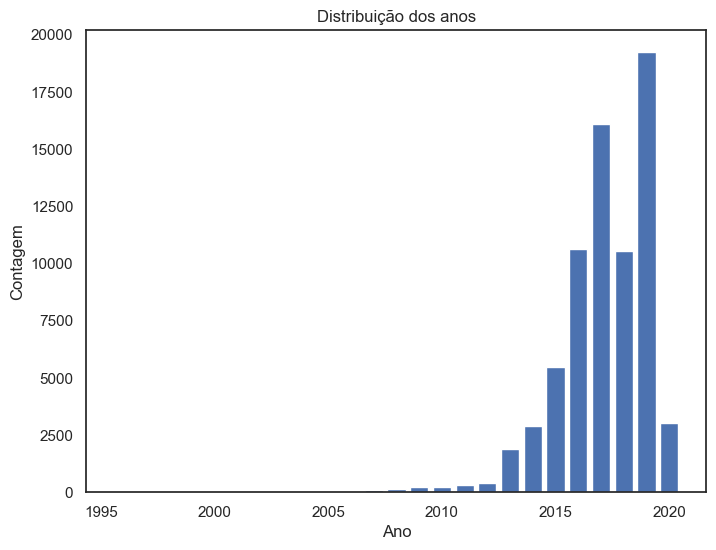

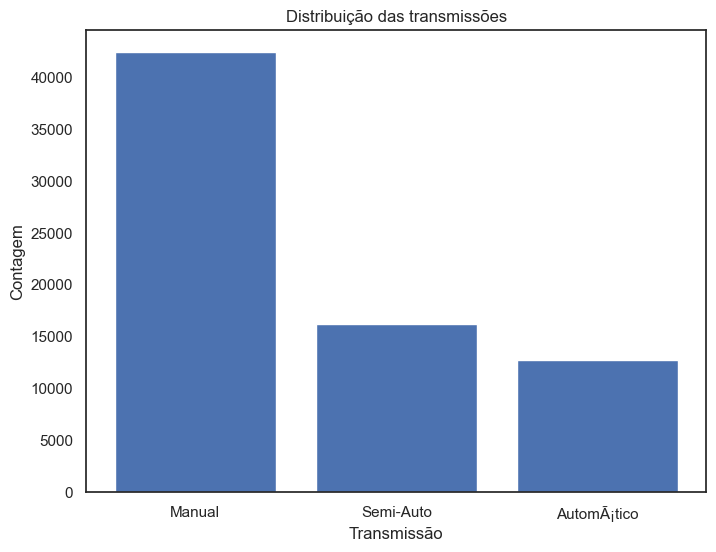

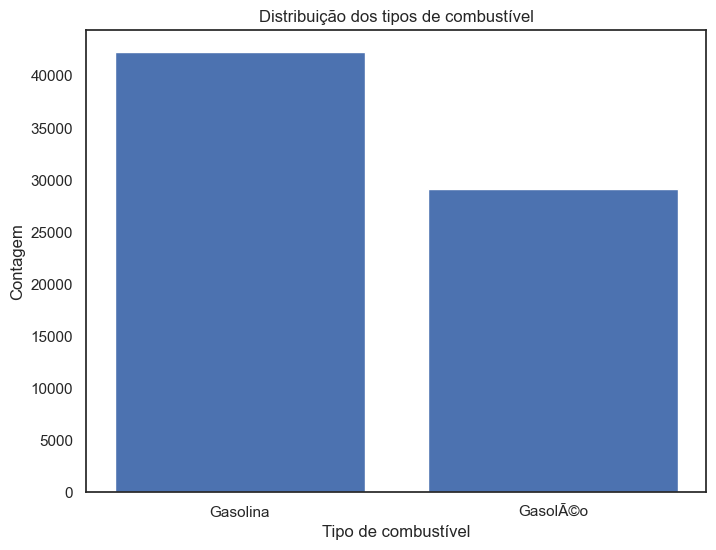

In [20]:
# Gráfico de barras para a variável "year"
plt.figure(figsize=(8,6))
plt.bar(df["ANO"].value_counts().index, df["ANO"].value_counts().values)
plt.title("Distribuição dos anos")
plt.xlabel("Ano")
plt.ylabel("Contagem")
plt.show()

# Gráfico de barras para a variável "transmission"
plt.figure(figsize=(8,6))
plt.bar(df["TRANSMISSAO"].value_counts().index, df["TRANSMISSAO"].value_counts().values)
plt.title("Distribuição das transmissões")
plt.xlabel("Transmissão")
plt.ylabel("Contagem")
plt.show()

# Gráfico de barras para a variável "fuelType"
plt.figure(figsize=(8,6))
plt.bar(df["TP_COMBUSTIVEL"].value_counts().index, df["TP_COMBUSTIVEL"].value_counts().values)
plt.title("Distribuição dos tipos de combustível")
plt.xlabel("Tipo de combustível")
plt.ylabel("Contagem")
plt.show()

In [21]:
# Agrupar por ANO e contar o número de ocorrências
car_count = df.groupby("ANO").size().reset_index(name="count")

# Exibir o resultado
print(car_count)

     ANO  count
0   1996      1
1   1997      1
2   1998      3
3   1999      1
4   2000      4
5   2001      5
6   2002     12
7   2003     24
8   2004     20
9   2005     57
10  2006     55
11  2007    116
12  2008    157
13  2009    229
14  2010    217
15  2011    299
16  2012    411
17  2013   1899
18  2014   2881
19  2015   5473
20  2016  10651
21  2017  16096
22  2018  10563
23  2019  19233
24  2020   3015


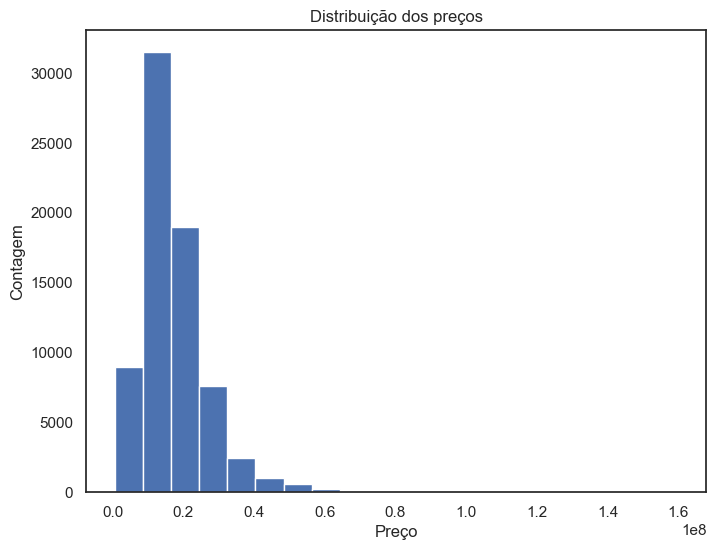

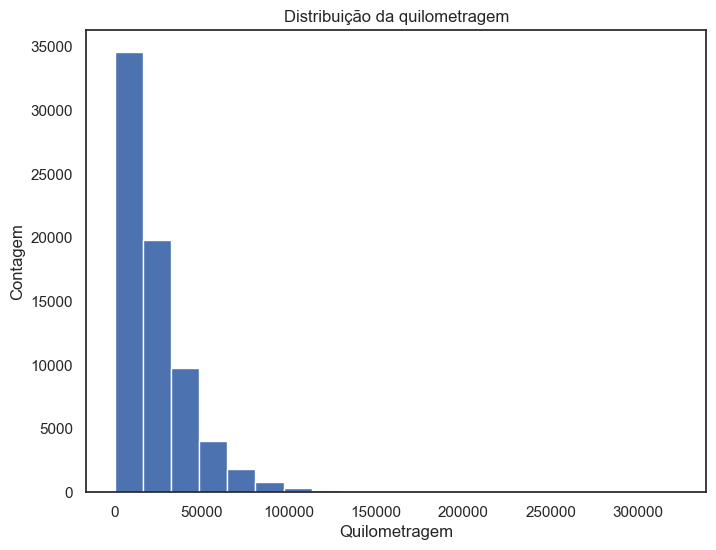

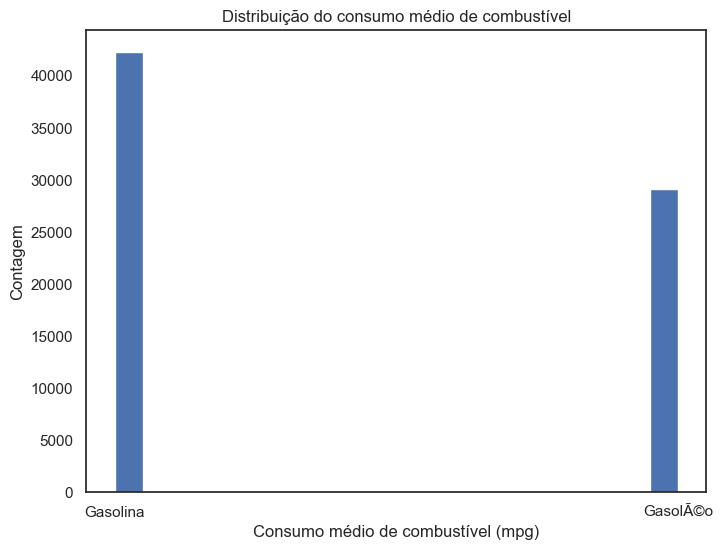

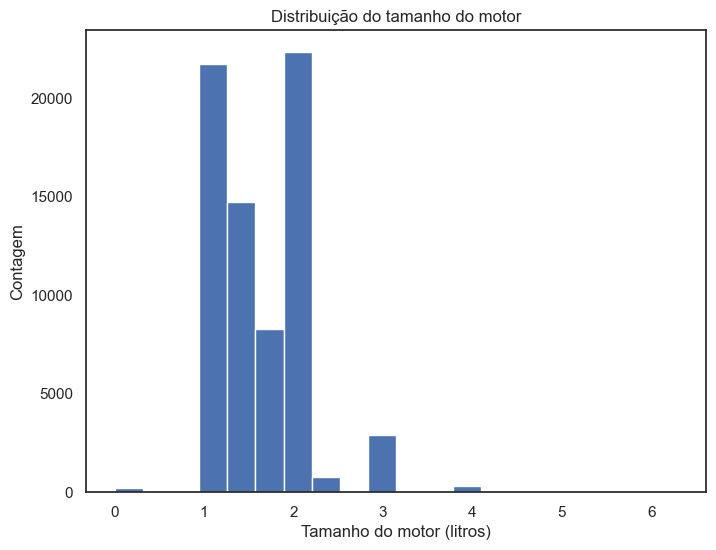

In [22]:
# Gráfico de histograma para a variável "price"
plt.figure(figsize=(8,6))
plt.hist(df["PRECO"], bins=20)
plt.title("Distribuição dos preços")
plt.xlabel("Preço")
plt.ylabel("Contagem")
plt.show()

# Gráfico de histograma para a variável "mileage"
plt.figure(figsize=(8,6))
plt.hist(df["QUILOMETRAGEM"], bins=20)
plt.title("Distribuição da quilometragem")
plt.xlabel("Quilometragem")
plt.ylabel("Contagem")
plt.show()

# Gráfico de histograma para a variável "mpg"
plt.figure(figsize=(8,6))
plt.hist(df["TP_COMBUSTIVEL"], bins=20)
plt.title("Distribuição do consumo médio de combustível")
plt.xlabel("Consumo médio de combustível (mpg)")
plt.ylabel("Contagem")
plt.show()

# Gráfico de histograma para a variável "engineSize"
plt.figure(figsize=(8,6))
plt.hist(df["MOTO_SIZE"], bins=20)
plt.title("Distribuição do tamanho do motor")
plt.xlabel("Tamanho do motor (litros)")
plt.ylabel("Contagem")
plt.show()

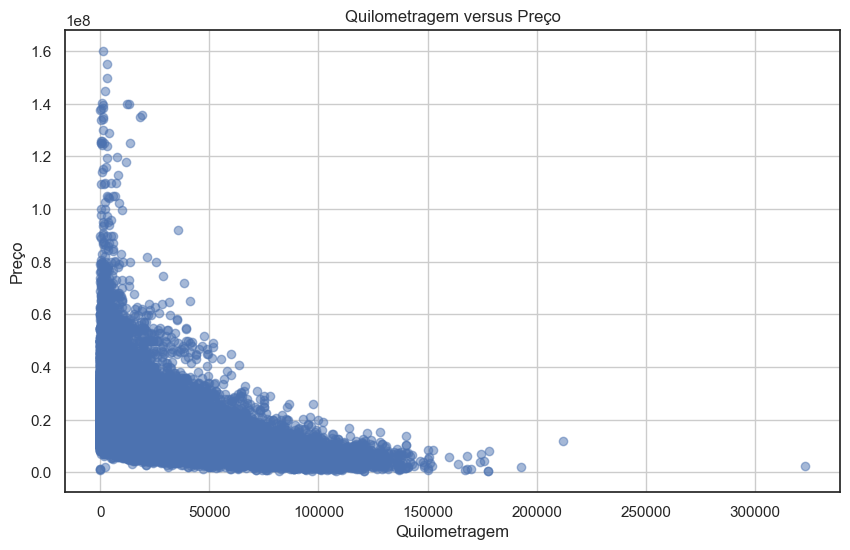

In [27]:
# Gráfico Quilometragem VS Preço
plt.figure(figsize=(10, 6))
plt.scatter(df['QUILOMETRAGEM'], df['PRECO'], alpha=0.5)
plt.title('Quilometragem versus Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

# gráfico de barras preço por marca
def plotar_preco_por_marca(preco_medio_por_marca):
    plt.figure(figsize=(12, 8))
    preco_medio_por_marca.plot(kind='bar')
    plt.title('Preço Médio por Marca')
    plt.xlabel('Marca')
    plt.ylabel('Preço Médio')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()


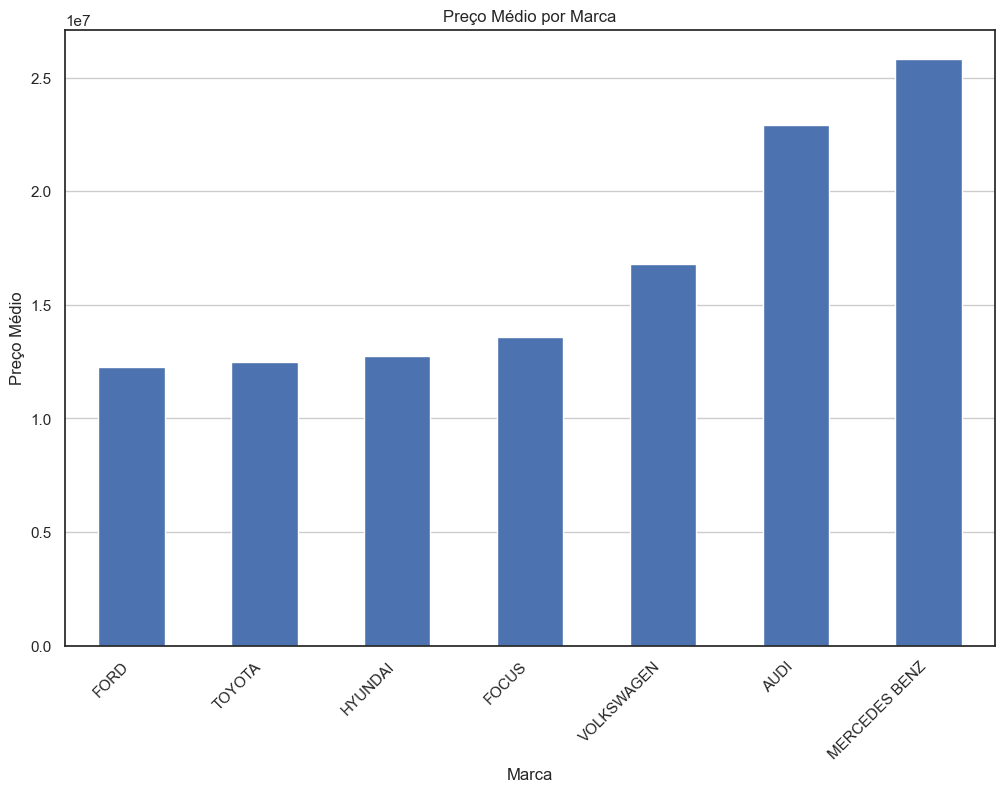

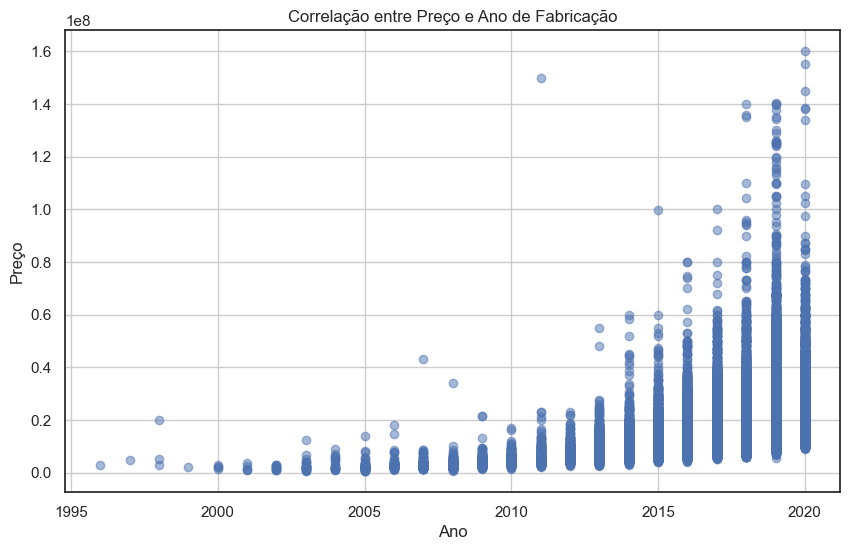

In [31]:
# Calcular o preço médio por marca
preco_medio_por_marca = df.groupby('MARCA')['PRECO'].mean().sort_values()

# Gráfico de barras Preço por Marca
plt.figure(figsize=(12, 8))
preco_medio_por_marca.plot(kind='bar')
plt.title('Preço Médio por Marca')
plt.xlabel('Marca')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Plotar Ano de Fabricação versus Preço
plt.figure(figsize=(10, 6))
plt.scatter(df['ANO'], df['PRECO'], alpha=0.5)
plt.title('Correlação entre Preço e Ano de Fabricação')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

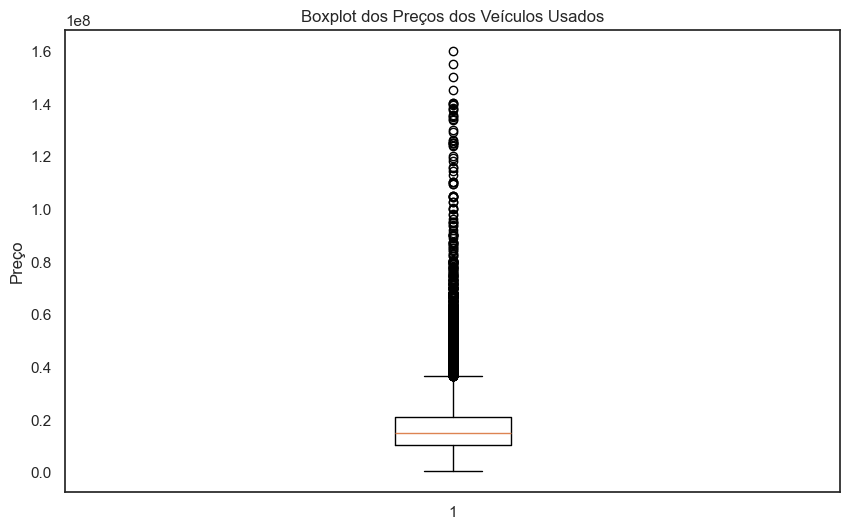

In [34]:
# Gráfico Boxplot dos preços dos veículos usados
plt.figure(figsize=(10, 6))
plt.boxplot(df['PRECO'])
plt.title('Boxplot dos Preços dos Veículos Usados')
plt.ylabel('Preço')
plt.grid(False)
plt.show()

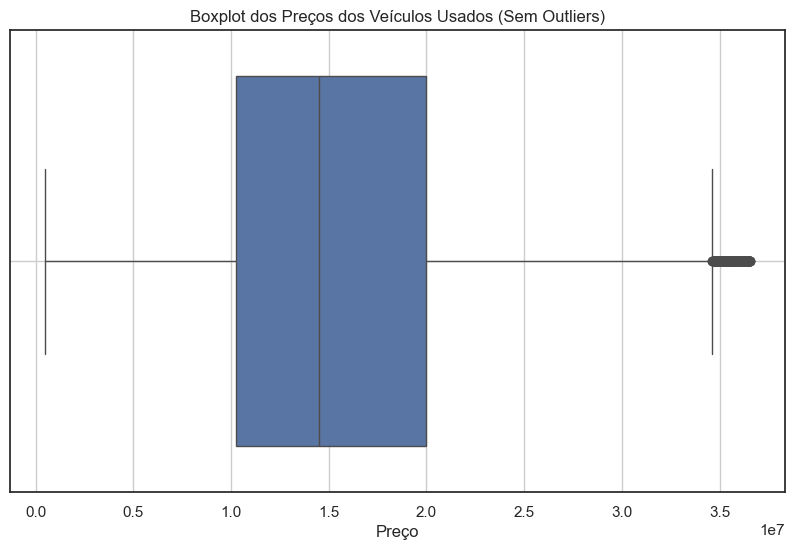

In [36]:
# Calcular IQR (Intervalo Interquartil)
Q1 = df['PRECO'].quantile(0.25)
Q3 = df['PRECO'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar dados para remover outliers
dados_sem_outliers = df[(df['PRECO'] >= limite_inferior) & (df['PRECO'] <= limite_superior)]

# Plotar o Boxplot dos preços dos veículos usados sem outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados_sem_outliers['PRECO'])
plt.title('Boxplot dos Preços dos Veículos Usados (Sem Outliers)')
plt.xlabel('Preço')
plt.grid(True)
plt.show()

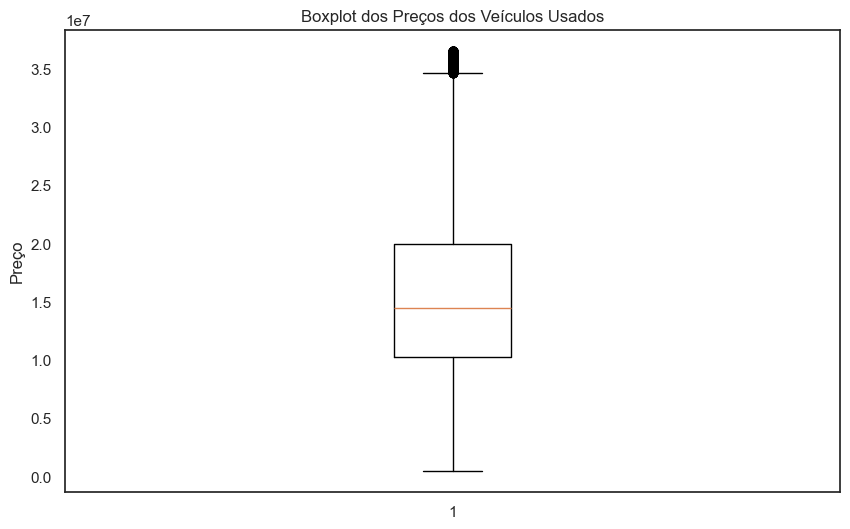

In [39]:
# Calcular IQR (Intervalo Interquartil)
Q1 = df['PRECO'].quantile(0.25)
Q3 = df['PRECO'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar dados para remover outliers
dados_sem_outliers = df[(df['PRECO'] >= limite_inferior) & (df['PRECO'] <= limite_superior)]

# Gráfico Boxplot dos preços dos veículos usados
plt.figure(figsize=(10, 6))
plt.boxplot(dados_sem_outliers['PRECO'])
plt.title('Boxplot dos Preços dos Veículos Usados')
plt.ylabel('Preço')
plt.grid(False)
plt.show()

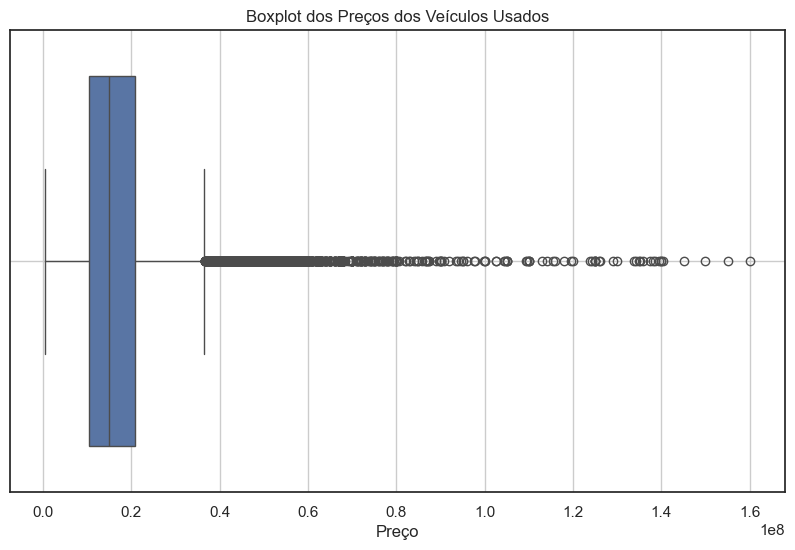

In [43]:
# Gráfico Boxplot dos preços dos veículos usados
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PRECO'])
plt.title('Boxplot dos Preços dos Veículos Usados')
plt.xlabel('Preço')
plt.grid(True)
plt.show()

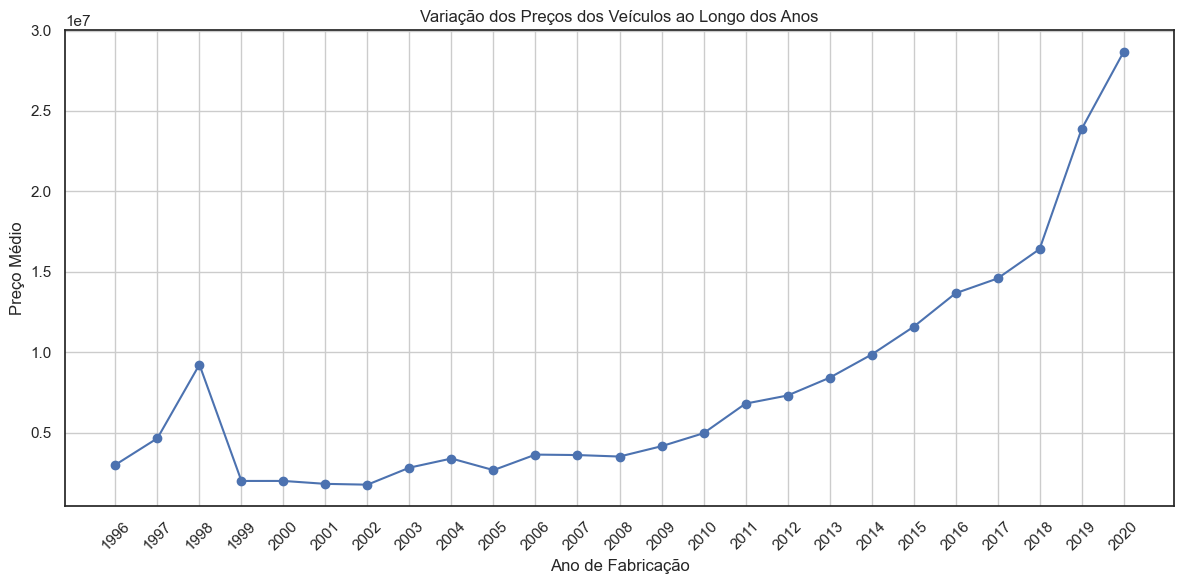

In [45]:
# Converter a coluna 'ano' para o tipo datetime para facilitar manipulação
df['ANO'] = pd.to_datetime(df['ANO'], format='%Y')

# Calcular a média dos preços por ano
preco_medio_por_ano = df.groupby(df['ANO'].dt.year)['PRECO'].mean()

# gráfico de linha da variação dos preços ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(preco_medio_por_ano.index, preco_medio_por_ano.values, marker='o', linestyle='-', color='b')
plt.title('Variação dos Preços dos Veículos ao Longo dos Anos')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço Médio')
plt.grid(True)
plt.xticks(preco_medio_por_ano.index, rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Codificar variáveis categóricas
label_encoder = LabelEncoder()
df["TP_COMBUSTIVEL"] = label_encoder.fit_transform(df["TP_COMBUSTIVEL"])

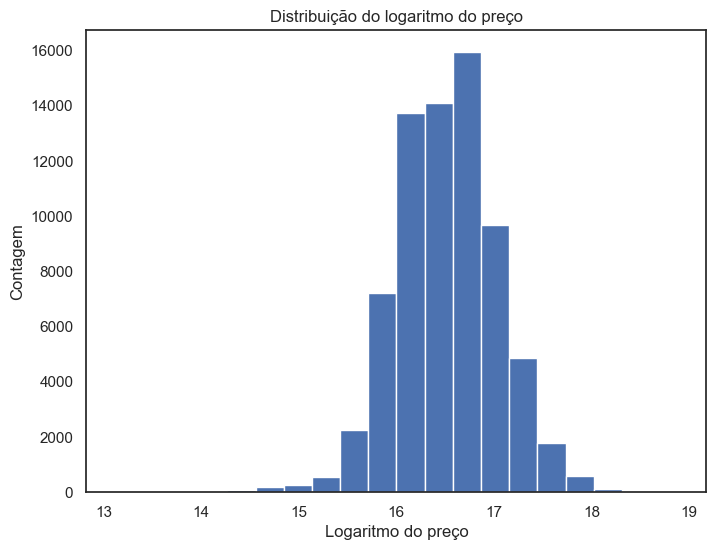

Correlação entre o logaritmo do preço e a quilometragem: 0.22917256449851997
Correlação entre o preço e a quilometragem: 0.22917256449851997
Correlação entre o logaritmo do preço e o consumo médio de combustível: 0.22917256449851997
Correlação entre o preço e o consumo médio de combustível: 0.199285725424249
Correlação entre o logaritmo do preço e o tamanho do motor: 0.5839697754833773
Correlação entre o preço e o tamanho do motor: 0.6526319377821902


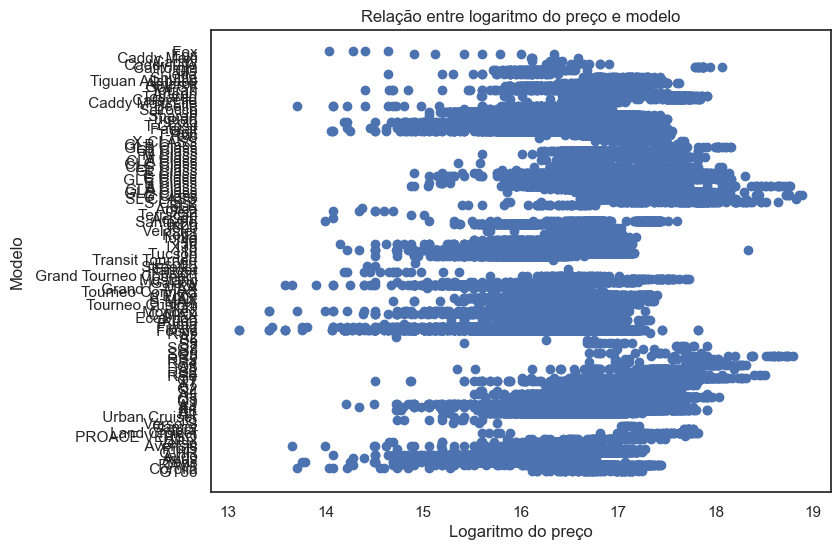

In [24]:
import math
# Adicionar uma nova coluna com o logaritmo do preço
df["PRECOLOG"] = df["PRECO"].apply(lambda x: math.log(x))
# Gráfico de histograma para o logaritmo do preço
plt.figure(figsize=(8,6))
plt.hist(df["PRECOLOG"], bins=20)
plt.title("Distribuição do logaritmo do preço")
plt.xlabel("Logaritmo do preço")
plt.ylabel("Contagem")
plt.show()

# Cálculo da correlação entre o logaritmo do preço e a quilometragem
correlation1 = df["PRECOLOG"].corr(df["TP_COMBUSTIVEL"])
print("Correlação entre o logaritmo do preço e a quilometragem:", correlation1)

# Cálculo da correlação entre o preço e a quilometragem
correlation2 = df["PRECOLOG"].corr(df["TP_COMBUSTIVEL"])
print("Correlação entre o preço e a quilometragem:", correlation2)

# Cálculo da correlação entre o logaritmo do preço e o consumo médio de combustível
correlation5 = df["PRECOLOG"].corr(df["TP_COMBUSTIVEL"])
print("Correlação entre o logaritmo do preço e o consumo médio de combustível:", correlation5)

# Cálculo da correlação entre o preço e o consumo médio de combustível
correlation6 = df["PRECO"].corr(df["TP_COMBUSTIVEL"])
print("Correlação entre o preço e o consumo médio de combustível:", correlation6)

# Cálculo da correlação entre o logaritmo do preço e o tamanho do motor
correlation7 = df["PRECOLOG"].corr(df["MOTO_SIZE"])
print("Correlação entre o logaritmo do preço e o tamanho do motor:", correlation7)

# Cálculo da correlação entre o preço e o tamanho do motor
correlation8 = df["PRECO"].corr(df["MOTO_SIZE"])
print("Correlação entre o preço e o tamanho do motor:", correlation8)

# Gráfico de dispersão entre o logaritmo do preço e a variável "model"
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["MODELO"])
plt.title("Relação entre logaritmo do preço e modelo")
plt.xlabel("Logaritmo do preço")
plt.ylabel("Modelo")
plt.show()

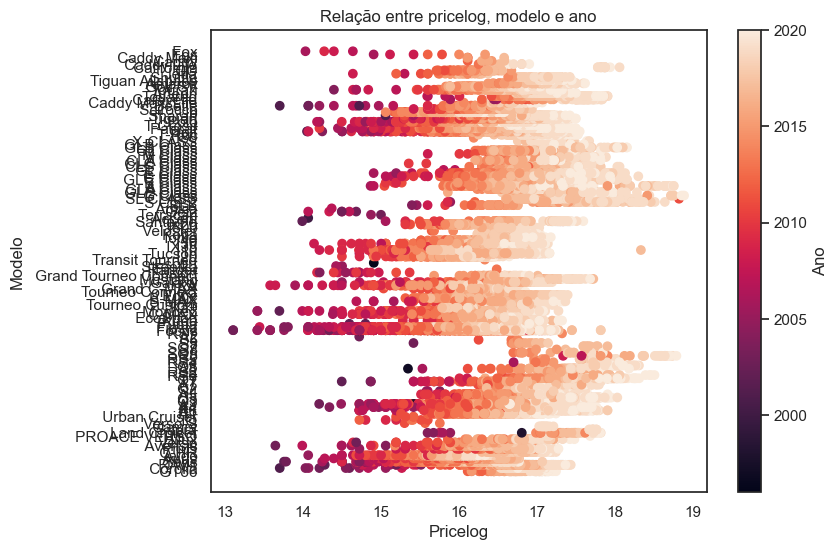

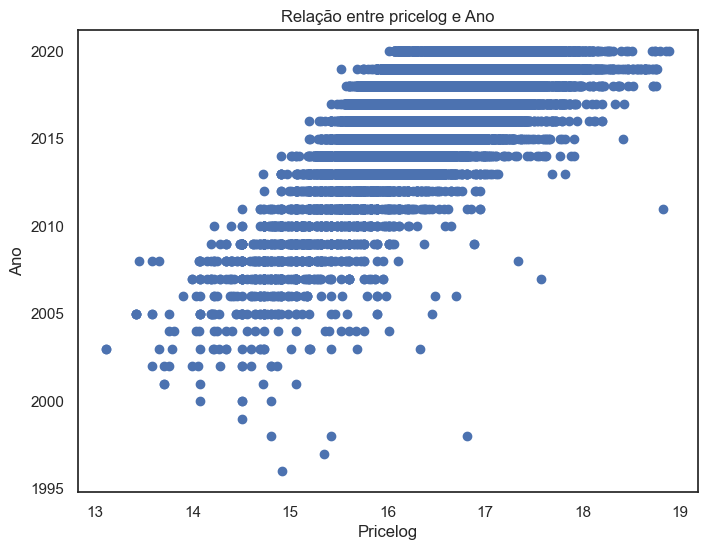

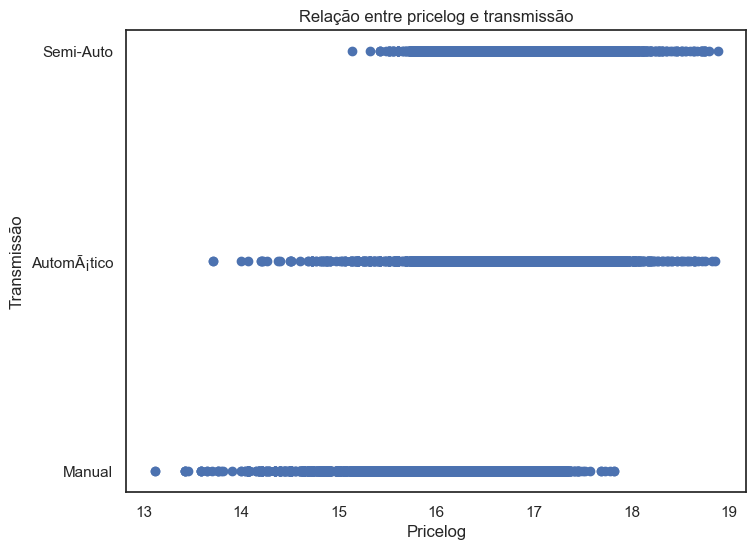

In [25]:
# Gráfico de dispersão entre pricelog, model e year
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["MODELO"], c=df["ANO"])
plt.title("Relação entre pricelog, modelo e ano")
plt.xlabel("Pricelog")
plt.ylabel("Modelo")
plt.colorbar(label="Ano")
plt.show()

# Gráfico de dispersão entre pricelog e year
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["ANO"])
plt.title("Relação entre pricelog e Ano")
plt.xlabel("Pricelog")
plt.ylabel("Ano")
plt.show()

# Filtrar o dataframe para o ano de 1998
car_filtered = df[df["PRECOLOG"] == 1998]

# Filtrar o dataframe para o modelo "Land Cruiser"
car_filtered = df[df["MODELO"] == "Land Cruiser"]

# Gráfico de dispersão entre pricelog e transmission
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["TRANSMISSAO"])
plt.title("Relação entre pricelog e transmissão")
plt.xlabel("Pricelog")
plt.ylabel("Transmissão")
plt.show()

# Filtrar o dataframe para a transmission "Other"
car_filtered = df[df["TRANSMISSAO"] == "Other"]

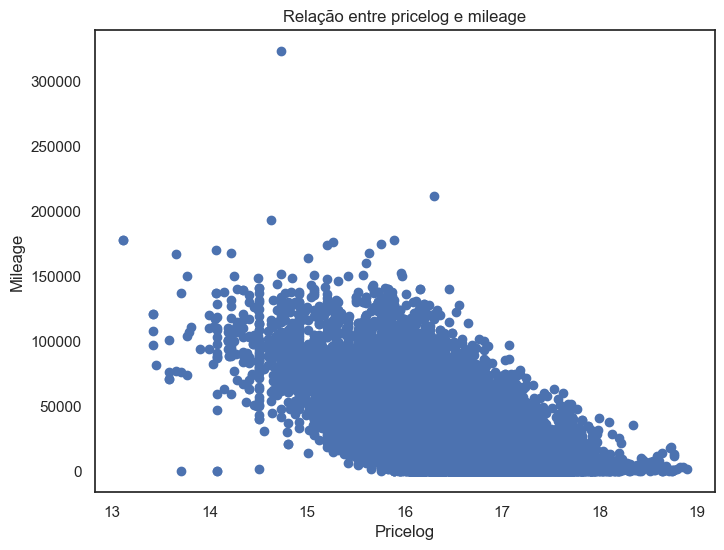

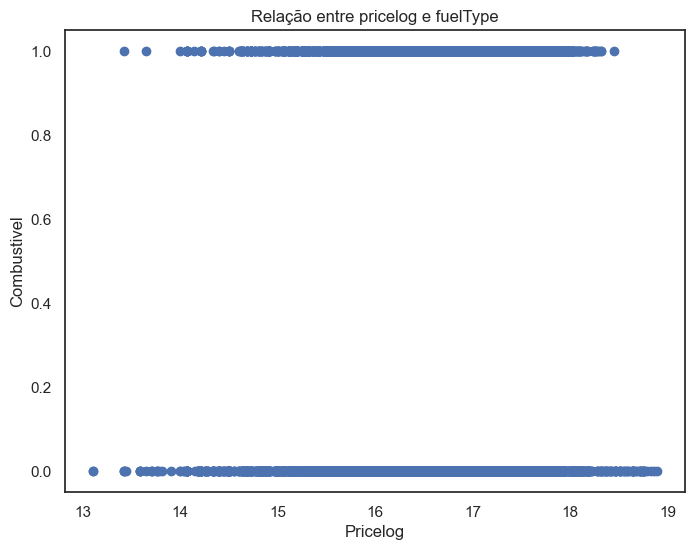

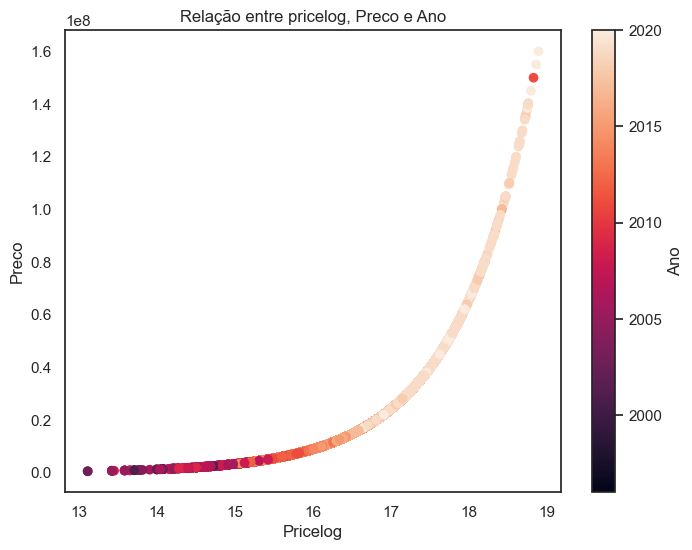

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         GT86
1         GT86
2         GT86
3         GT86
4         GT86
         ...  
71618      Eos
71619      Fox
71620      Fox
71621      Fox
71622      Fox
Name: MODELO, Length: 71423, dtype: object

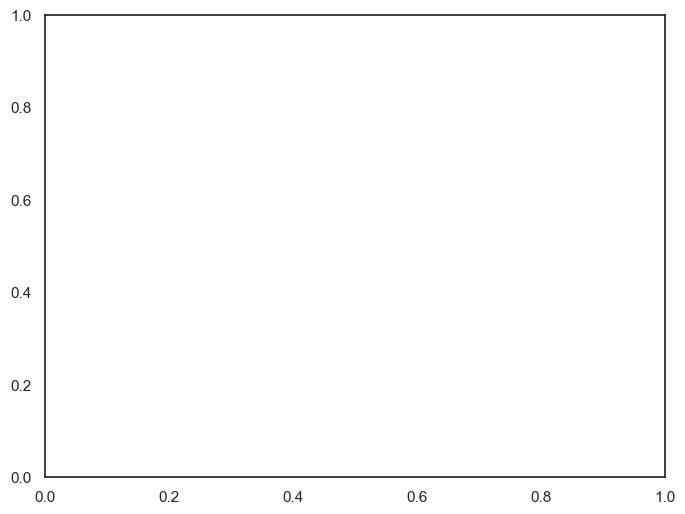

In [26]:
# Gráfico de dispersão entre pricelog e mileage
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["QUILOMETRAGEM"])
plt.title("Relação entre pricelog e mileage")
plt.xlabel("Pricelog")
plt.ylabel("Mileage")
plt.show()

# Gráfico de dispersão entre pricelog e fuelType
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["TP_COMBUSTIVEL"])
plt.title("Relação entre pricelog e fuelType")
plt.xlabel("Pricelog")
plt.ylabel("Combustivel")
plt.show()

# Gráfico de dispersão entre pricelog, tax e year
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["PRECO"], c=df["ANO"])
plt.title("Relação entre pricelog, Preco e Ano")
plt.xlabel("Pricelog")
plt.ylabel("Preco")
plt.colorbar(label="Ano")
plt.show()

# Gráfico de dispersão entre pricelog, tax e fuelType
plt.figure(figsize=(8,6))
plt.scatter(df["PRECOLOG"], df["TP_COMBUSTIVEL"], c=df["MODELO"])
plt.title("Relação entre pricelog, tax e fuelType")
plt.xlabel("Pricelog")
plt.ylabel("Combustivel")
plt.colorbar(label="Modelo")
plt.show()

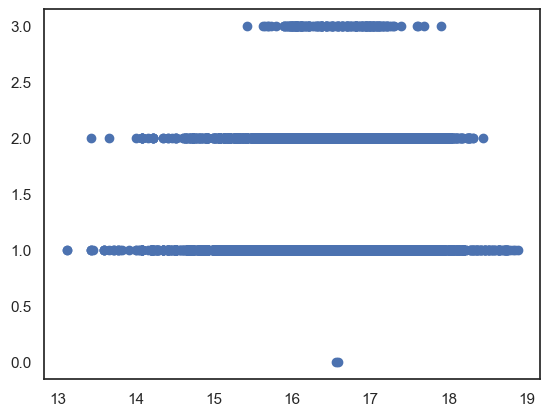

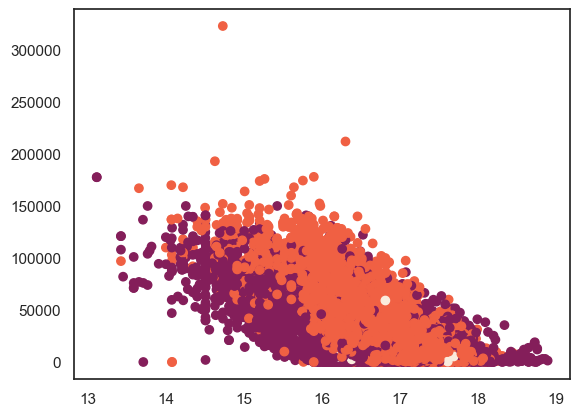

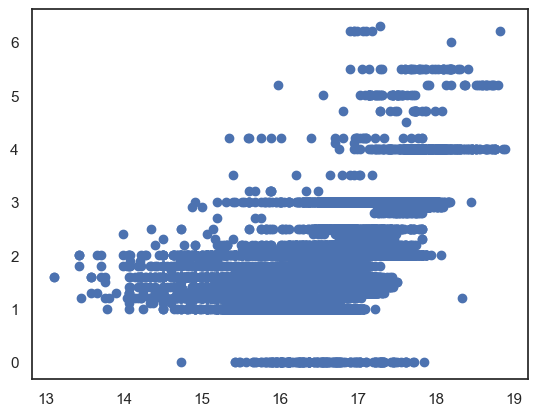

       TP_COMBUSTIVEL     MOTO_SIZE           ANO  QUILOMETRAGEM  \
count    71623.000000  71623.000000  71623.000000   71623.000000   
mean         1.412591      1.617224   2017.115563   22476.508482   
std          0.497860      0.554331      2.067163   20396.652254   
min          0.000000      0.000000   1996.000000       1.000000   
25%          1.000000      1.100000   2016.000000    7500.000000   
50%          1.000000      1.500000   2017.000000   16934.000000   
75%          2.000000      2.000000   2019.000000   31457.000000   
max          3.000000      6.300000   2060.000000  323000.000000   

              PRECO      PRECOLOG  
count  7.162300e+04  71623.000000  
mean   1.701771e+07     16.513868  
std    9.746485e+06      0.522541  
min    4.950000e+05     13.112313  
25%    1.045000e+07     16.162113  
50%    1.499500e+07     16.523227  
75%    2.094500e+07     16.857411  
max    1.599990e+08     18.890678  


In [ ]:
# ggplot(car, aes(pricelog, mpg)) + geom_point()
plt.scatter(df["PRECOLOG"], df["TP_COMBUSTIVEL"])
plt.show()

# car %>% ggplot(aes(pricelog, mpg, color = fuelType)) + geom_point()
plt.scatter(df['PRECOLOG'], df['QUILOMETRAGEM'], c=df['TP_COMBUSTIVEL'])
plt.show()

# ggplot(car, aes(pricelog, engineSize)) + geom_point()
plt.scatter(df['PRECOLOG'], df['MOTO_SIZE'])
plt.show()

# car %>% filter(engineSize == 0)
car_filtered = df[df['MOTO_SIZE'] == 0]

# summary(car)
car_summary = df.describe()
print(car_summary)

## Distribuição de Veículos com base no Ano de Registro

Text(0, 0.5, 'Densidade')

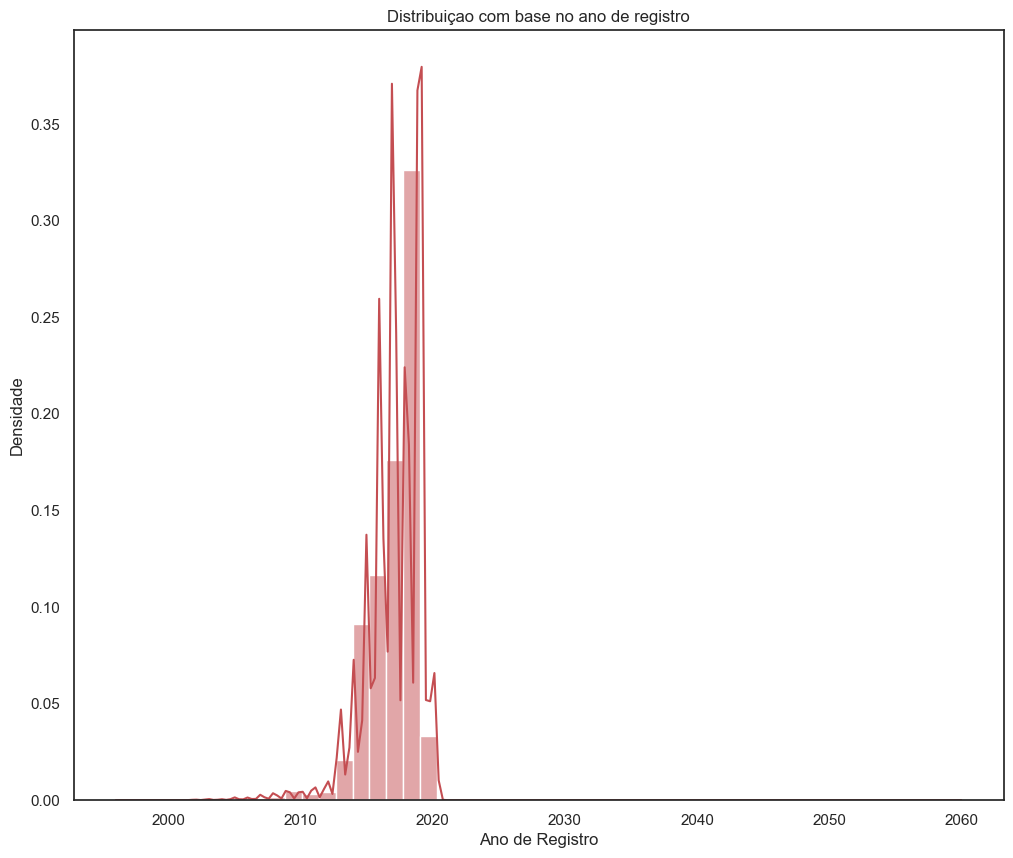

In [ ]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig1, ax = plt.subplots(figsize=(12,10))
sns.histplot(df['ANO'], bins = 50, color ='r', kde=True, stat="density")
ax.set_title('Distribuiçao com base no ano de registro')
plt.xlabel('Ano de Registro')
plt.ylabel('Densidade')

## Variação da faixa de preço pelo tipo de veículo

In [ ]:
# Crie um Boxplot para avaliar os outliers
fig1 = plt.figure(figsize=(12,10))
eixoX = df["vehicleType"]
eixoY = df["price"]
sns.boxplot(x =eixoX, y = eixoY ).set(title='Analise de Outliers')
plt.xlabel('Tipo de veiculo')
plt.ylabel('Range de preço')
plt.show()

## Contagem total de veículos à venda conforme o tipo de veículo

In [ ]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
fig1, ax = plt.subplots(figsize=(12,10))
sns.countplot(x ='vehicleType', data=df, palette="prism")
ax.set_title('Contagem total de veiculos a venda conforme o tipo de veiculo')
ax.set_xlabel('Tipo de veiculo')
ax.set_ylabel('Total de veiculos à venda')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
           ha='center', va='bottom')

plt.show()

## Número de veículos pertencentes a cada marca

In [ ]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
fig = plt.figure()
g = sns.catplot(y='brand', data=df, color='r',height=7, aspect=1.5, kind='count')
g.ax.set_title('Veículos por Marca')
g.ax.xaxis.set_label_text('Número de veículos')
g.ax.yaxis.set_label_text('Marca')
plt.show()

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

In [ ]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='vehicleType', data=df, y = 'price', hue='gearbox')
ax.set_title('Preço medio dos veiculos por tipo de veiculo e tipo de cambio')
ax.set_xlabel('Tipo de veiculo')
ax.set_ylabel('Preço medio')
plt.show()

## Preço médio de um veículo por marca, bem como tipo de veículo

In [ ]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
result = trial.pivot('brand', 'vehicleType', 'avgPrice')
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(result, linewidths=1, cmap='Dark2', annot=True, ax = ax,  fmt='d')
ax.set_title('Heatmap - Preço médio de um veículo por marca e tipo de veículo',fontdict={'size':15})
ax.xaxis.set_label_text('tipo de veiculo',fontdict={'size':15})
ax.yaxis.set_label_text('Marca',fontdict={'size':15})
plt.show()

In [ ]:
#Verificando se há dados inconsistentes.
df["TP_COMBUSTIVEL"].value_counts()

TP_COMBUSTIVEL
Gasolina    42263
GasolÃ©o    29163
Other         195
Electric        2
Name: count, dtype: int64

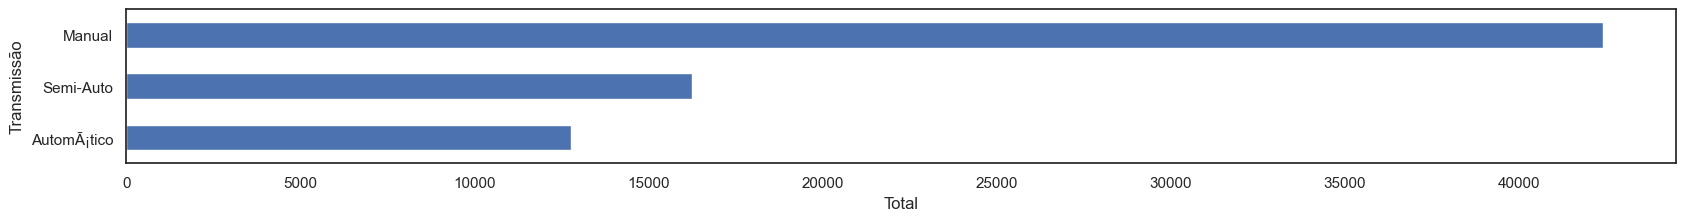

In [ ]:
# Gráfico por tipo de transmissão.
plt.figure(figsize=(20, 2))
df["TRANSMISSAO"].value_counts(ascending=True).plot.barh();
plt.ylabel("Transmissão");
plt.xlabel("Total");

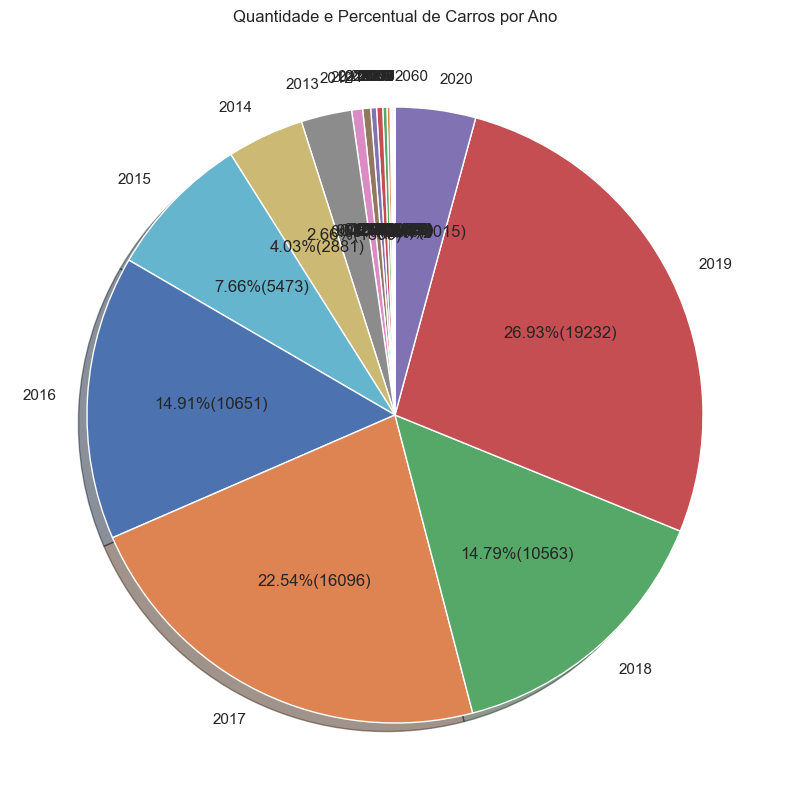

In [ ]:

# Usar o ano corrente dinamicamente
current_year = datetime.now().year

# Contar a quantidade de carros por ano
carros_por_ano = df["ANO"].value_counts()

# Definir a ordem dos anos para manter a consistência
carros_por_ano = carros_por_ano.sort_index()

# Configurar a explosão para destacar o ano corrente
explode = [0.2 if year == current_year else 0 for year in carros_por_ano.index]

# Criar o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(
    carros_por_ano,
    labels=carros_por_ano.index,
    explode=explode,
    shadow=True,
    startangle=90,
    autopct=lambda p: '{:.2f}%({:.0f})'.format(p, (p/100)*carros_por_ano.sum())
)
plt.title('Quantidade e Percentual de Carros por Ano')
plt.show()


In [ ]:
#Gráfico pizza com a quantidade e percentual de carros por ano. Destaque para o ano corrente. 
df["ANO"].value_counts().plot.pie(figsize=(10, 10), explode = (0, 0, 0, 0, 0, 0.2), shadow = True, startangle=90, 
                                  autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*df.groupby('ANO').size().sum()));

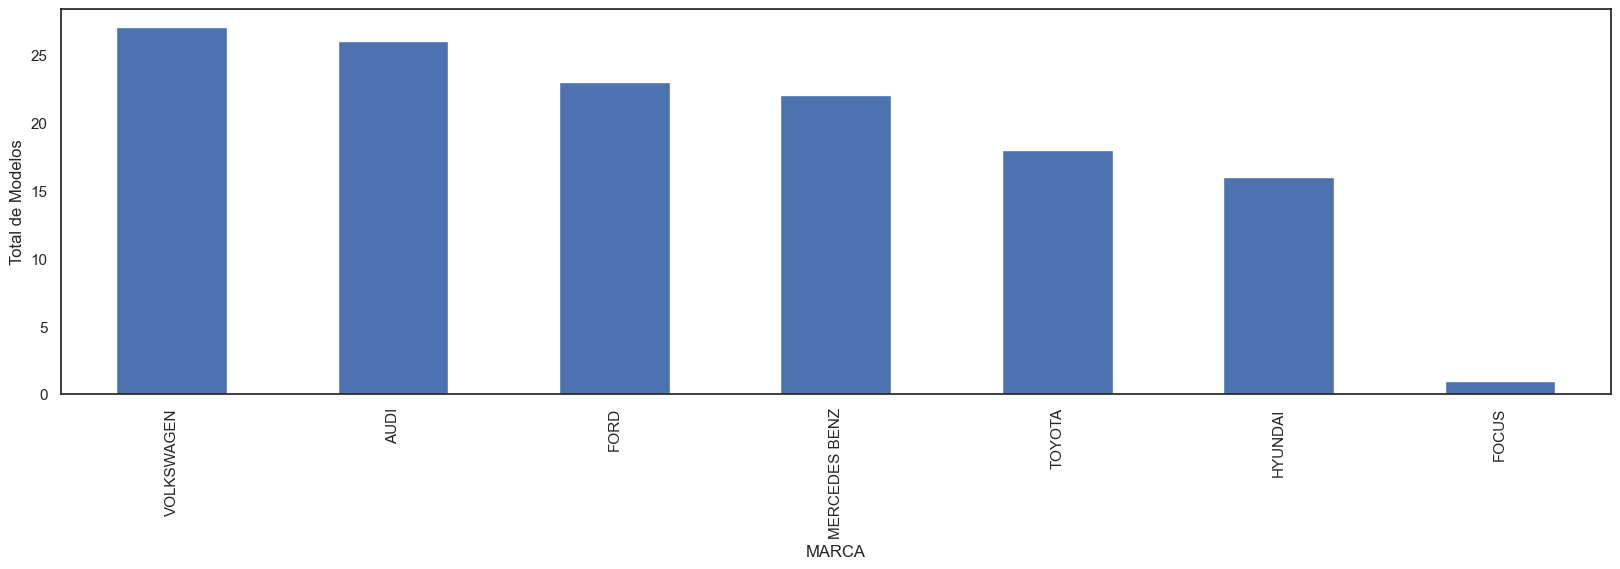

In [ ]:
#Gráfico da quantidade de modelo por fabricante.
plt.figure(figsize=(20, 5))
df.groupby("MARCA")["MODELO"].nunique().sort_values(ascending=False).plot.bar();
plt.xlabel("MARCA")
plt.ylabel("Total de Modelos");

In [ ]:
#Os 5 veículos mais caros.
df.nlargest(5, "PRECO")

,MARCA,MODELO,TRANSMISSAO,TP_COMBUSTIVEL,MOTO_SIZE,ANO,QUILOMETRAGEM,PRECO
51884,MERCEDES BENZ,G Class,Semi-Auto,Gasolina,4.00,2020,1350,159999000
55729,MERCEDES BENZ,G Class,AutomÃ¡tico,Gasolina,4.00,2020,3000,154998000
45690,MERCEDES BENZ,SL CLASS,AutomÃ¡tico,Gasolina,6.20,2011,3000,149948000
11521,AUDI,R8,Semi-Auto,Gasolina,5.20,2020,2000,145000000
54422,MERCEDES BENZ,A Class,Semi-Auto,Gasolina,4.00,2019,785,140319000


In [ ]:
#Os 5 veículos mais baratos.
df.nsmallest(5, "PRECO").sort_values(by="PRECO", ascending=False)

,MARCA,MODELO,TRANSMISSAO,TP_COMBUSTIVEL,MOTO_SIZE,ANO,QUILOMETRAGEM,PRECO
22081,FOCUS,Focus,Manual,Gasolina,2.00,2005,121000,675000
37082,FORD,Mondeo,Manual,GasolÃ©o,2.00,2005,97000,675000
39671,FORD,Mondeo,Manual,Gasolina,1.80,2005,108000,675000
22300,FOCUS,Focus,Manual,Gasolina,1.60,2003,177644,495000
39963,FORD,Focus,Manual,Gasolina,1.60,2003,177644,495000
